## Content

[1. Import libraries](#Import_libraries)<br>
[2. Import data](#Import_data)<br>
[3.Data cleaning](#Data_cleaning)<br>
[- Removing lines with sold cars](#Removing_lines_with_sold_cars)<br>
[- Shifting data with missing columns 1 column to the right](#Shifting_data_with_missing_columns_1_column_to_the_right)<br>
[- Removing extra spaces](#Removing_extra_spaces)<br>
[- Shifting data on right columns](#Shifting_data_on_right_columns)<br>
[- Split data in "auto_engine" into 3 columns](#Split_auto_engine)<br>
[- Formating columns (Dtype, creating new columns, etc.)](#Formating_columns)<br>
[4. Exploratory data analysis](#Exploratory_data_analysis)<br>

<a id='Import_libraries'></a>
<h2>Import libraries</h2>

In [553]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics 
from sklearn.metrics import mean_squared_error

<a id='Import_data'></a>
## Import data

In [554]:
data = pd.read_csv("auto_data.csv", sep=';')
data.shape

(4060, 13)

In [555]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4060 entries, 0 to 4059
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Type               4043 non-null   object
 1   auto_price         2159 non-null   object
 2   auto_year          4043 non-null   object
 3   auto_owners        4043 non-null   object
 4   auto_guarantee     4043 non-null   object
 5   auto_mileage       4043 non-null   object
 6   auto_engine        4043 non-null   object
 7   auto_transmission  4043 non-null   object
 8   auto_drive_unit    4043 non-null   object
 9   auto_wheel         4043 non-null   object
 10  auto_carcase       4031 non-null   object
 11  auto_color         3714 non-null   object
 12  link               4060 non-null   object
dtypes: object(13)
memory usage: 412.5+ KB


We see that there is a lot of data without info on car price. Cars with empty 'auto_price' column were sold, but information about them was not removed from the website.

<a id='Data_cleaning'></a>
## Data cleaning

<a id='Removing_lines_with_sold_cars'></a>
### Removing lines with sold cars 

In [556]:
data = data.dropna(subset=['auto_price'])

In [557]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 3745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Type               2159 non-null   object
 1   auto_price         2159 non-null   object
 2   auto_year          2159 non-null   object
 3   auto_owners        2159 non-null   object
 4   auto_guarantee     2159 non-null   object
 5   auto_mileage       2159 non-null   object
 6   auto_engine        2159 non-null   object
 7   auto_transmission  2159 non-null   object
 8   auto_drive_unit    2159 non-null   object
 9   auto_wheel         2159 non-null   object
 10  auto_carcase       2149 non-null   object
 11  auto_color         1964 non-null   object
 12  link               2159 non-null   object
dtypes: object(13)
memory usage: 236.1+ KB


There are also some empty cells in 'auto_color' column.
Actually, data on some cars were shifted 1 column to the left as those cars has empty 'auto_guarantee' column (which means that cars doesn't have guarantee).

<a id='Shifting_data_with_missing_columns_1_column_to_the_right'></a>
### Shifting data with missing guarantee 1 column to the right

In [558]:
data['guarantee'] = 1
#data
data.loc[data['auto_color'].isnull(), ['guarantee']] = 0

In [559]:
data_to_shift = data.loc[data['guarantee'] == 0]
data = data.drop(data[data['guarantee'] == 0].index)
data_to_shift.shape, data.shape

((195, 14), (1964, 14))

In [560]:
data_to_shift.head()

,Type,auto_price,auto_year,auto_owners,auto_guarantee,auto_mileage,auto_engine,auto_transmission,auto_drive_unit,auto_wheel,auto_carcase,auto_color,link,guarantee
45,\r\n Mercedes C-Класс АКПП 2016 с пробе...,\r\n 1 750 000 ₽,\r\n 110 000 км\r\n,\r\n 5 владельце...,\r\n 2016,\r\n 1.6 л /\r\n 156...,\r\n Автоматическая,\r\n Задний,Левый,\r\n Седан,\r\n Красный,NaN,https://rolf-probeg.ru//spb/cars/mercedes/c-kl...,0
74,\r\n Peugeot 308 АКПП 2010 с пробегом 1...,\r\n 400 000 ₽,\r\n 162 760 км\r\n,\r\n 2 владельца...,\r\n 2010,\r\n 1.6 л /\r\n 120...,\r\n Автоматическая,\r\n Передний,Левый,\r\n Хэтчбек 5 дв.,\r\n Черный,NaN,https://rolf-probeg.ru//spb/cars/peugeot/308/1...,0
85,\r\n Mazda CX-3 АКПП 2018 с пробегом 29...,\r\n 2 095 000 ₽,\r\n 29 624 км\r\n,\r\n 1 владелец ...,\r\n 2018,\r\n 1.5 л /\r\n 105...,\r\n Автоматическая,\r\n Полный,Левый,\r\n Внедорожник 5 дв.,\r\n Красный,NaN,https://rolf-probeg.ru//spb/cars/mazda/cx_3/16...,0
132,\r\n Mercedes M-Класс АКПП 2011 с пробе...,\r\n 1 325 000 ₽,\r\n 155 657 км\r\n,\r\n 4 владельца...,\r\n 2011,\r\n 3.5 л /\r\n 272...,\r\n Автоматическая,\r\n Полный,Левый,\r\n Внедорожник 5 дв.,\r\n Серый,NaN,https://rolf-probeg.ru//spb/cars/mercedes/m-kl...,0
142,\r\n Land Rover Range Rover Evoque АКПП...,\r\n 1 999 000 ₽,\r\n 107 000 км\r\n,\r\n 4 владельца...,\r\n 2013,\r\n 2.2 л /\r\n 190...,\r\n Автоматическая,\r\n Полный,Левый,\r\n Внедорожник 3 дв.,\r\n Черный,NaN,https://rolf-probeg.ru//spb/cars/land-rover/ra...,0


In [561]:
data_to_shift['auto_color'] = data_to_shift['auto_carcase']
data_to_shift['auto_carcase'] = data_to_shift['auto_wheel']
data_to_shift['auto_wheel'] = data_to_shift['auto_drive_unit']
data_to_shift['auto_drive_unit'] = data_to_shift['auto_transmission']
data_to_shift['auto_transmission'] = data_to_shift['auto_engine']
data_to_shift['auto_engine'] = data_to_shift['auto_mileage']
data_to_shift['auto_mileage'] = data_to_shift['auto_year']
data_to_shift['auto_year'] = data_to_shift['auto_guarantee']
data_to_shift['auto_guarantee'] = "Нет гарантии"

In [562]:
data_to_shift.head()

,Type,auto_price,auto_year,auto_owners,auto_guarantee,auto_mileage,auto_engine,auto_transmission,auto_drive_unit,auto_wheel,auto_carcase,auto_color,link,guarantee
45,\r\n Mercedes C-Класс АКПП 2016 с пробе...,\r\n 1 750 000 ₽,\r\n 2016,\r\n 5 владельце...,Нет гарантии,\r\n 110 000 км\r\n,\r\n 1.6 л /\r\n 156...,\r\n Автоматическая,\r\n Задний,Левый,\r\n Седан,\r\n Красный,https://rolf-probeg.ru//spb/cars/mercedes/c-kl...,0
74,\r\n Peugeot 308 АКПП 2010 с пробегом 1...,\r\n 400 000 ₽,\r\n 2010,\r\n 2 владельца...,Нет гарантии,\r\n 162 760 км\r\n,\r\n 1.6 л /\r\n 120...,\r\n Автоматическая,\r\n Передний,Левый,\r\n Хэтчбек 5 дв.,\r\n Черный,https://rolf-probeg.ru//spb/cars/peugeot/308/1...,0
85,\r\n Mazda CX-3 АКПП 2018 с пробегом 29...,\r\n 2 095 000 ₽,\r\n 2018,\r\n 1 владелец ...,Нет гарантии,\r\n 29 624 км\r\n,\r\n 1.5 л /\r\n 105...,\r\n Автоматическая,\r\n Полный,Левый,\r\n Внедорожник 5 дв.,\r\n Красный,https://rolf-probeg.ru//spb/cars/mazda/cx_3/16...,0
132,\r\n Mercedes M-Класс АКПП 2011 с пробе...,\r\n 1 325 000 ₽,\r\n 2011,\r\n 4 владельца...,Нет гарантии,\r\n 155 657 км\r\n,\r\n 3.5 л /\r\n 272...,\r\n Автоматическая,\r\n Полный,Левый,\r\n Внедорожник 5 дв.,\r\n Серый,https://rolf-probeg.ru//spb/cars/mercedes/m-kl...,0
142,\r\n Land Rover Range Rover Evoque АКПП...,\r\n 1 999 000 ₽,\r\n 2013,\r\n 4 владельца...,Нет гарантии,\r\n 107 000 км\r\n,\r\n 2.2 л /\r\n 190...,\r\n Автоматическая,\r\n Полный,Левый,\r\n Внедорожник 3 дв.,\r\n Черный,https://rolf-probeg.ru//spb/cars/land-rover/ra...,0


In [563]:
data_to_shift.shape

(195, 14)

In [564]:
data = pd.concat([data, data_to_shift])

In [565]:
data.shape

(2159, 14)

In [566]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2927
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Type               2159 non-null   object
 1   auto_price         2159 non-null   object
 2   auto_year          2159 non-null   object
 3   auto_owners        2159 non-null   object
 4   auto_guarantee     2159 non-null   object
 5   auto_mileage       2159 non-null   object
 6   auto_engine        2159 non-null   object
 7   auto_transmission  2159 non-null   object
 8   auto_drive_unit    2159 non-null   object
 9   auto_wheel         2159 non-null   object
 10  auto_carcase       2159 non-null   object
 11  auto_color         2149 non-null   object
 12  link               2159 non-null   object
 13  guarantee          2159 non-null   int64 
dtypes: int64(1), object(13)
memory usage: 253.0+ KB


In [567]:
data[data['auto_color'].isnull()]['link'].unique()

array(['https://rolf-probeg.ru//spb/cars/mitsubishi/pajero/16096144/',
       'https://rolf-probeg.ru//spb/cars/mitsubishi/pajero/16096132/',
       'https://rolf-probeg.ru//spb/cars/mazda/mx-30/16091848/',
       'https://rolf-probeg.ru//spb/cars/kia/carnival/16076387/',
       'https://rolf-probeg.ru//spb/cars/ford/f-150/16060346/',
       'https://rolf-probeg.ru//spb/cars/hyundai/grand-starex/16090529/',
       'https://rolf-probeg.ru//spb/cars/kia/carnival/16073953/',
       'https://rolf-probeg.ru//spb/cars/kia/optima/16091494/',
       'https://rolf-probeg.ru//spb/cars/hyundai/sonata/16074798/',
       'https://rolf-probeg.ru//spb/cars/lexus/gs/16069061/'],
      dtype=object)

In [568]:
data_shift_1 = data[data['auto_color'].isnull()]
data = data.drop(data[data['auto_color'].isnull()].index)
data.shape, data_shift_1.shape

((2149, 14), (10, 14))

In [569]:
data_shift_1.head()

,Type,auto_price,auto_year,auto_owners,auto_guarantee,auto_mileage,auto_engine,auto_transmission,auto_drive_unit,auto_wheel,auto_carcase,auto_color,link,guarantee
262,\r\n Mitsubishi Pajero АКПП 2021 с проб...,\r\n 4 299 000 ₽,\r\n 22 км\r\n,\r\n 2021,Нет гарантии,\r\n 3.0 л /\r\n 174...,\r\n Автоматическая,\r\n Полный,Левый,\r\n Внедорожник 5 дв.,\r\n Серый,NaN,https://rolf-probeg.ru//spb/cars/mitsubishi/pa...,0
278,\r\n Mitsubishi Pajero АКПП 2021 с проб...,\r\n 4 299 000 ₽,\r\n 21 км\r\n,\r\n 2021,Нет гарантии,\r\n 3.0 л /\r\n 174...,\r\n Автоматическая,\r\n Полный,Левый,\r\n Внедорожник 5 дв.,\r\n Серый,NaN,https://rolf-probeg.ru//spb/cars/mitsubishi/pa...,0
930,\r\n Mazda MX-30 АКПП 2020 с пробегом 2...,\r\n 2 690 000 ₽,\r\n 2 410 км\r\n,\r\n 2020,Нет гарантии,\r\n 0.0 л /\r\n 145...,\r\n Автоматическая,\r\n Передний,Левый,\r\n Внедорожник 5 дв.,\r\n Серый,NaN,https://rolf-probeg.ru//spb/cars/mazda/mx-30/1...,0
1130,\r\n Kia Carnival АКПП 2017 с пробегом ...,\r\n 2 630 000 ₽,\r\n 51 978 км\r\n,\r\n 2017,Нет гарантии,\r\n 2.2 л /\r\n 202...,\r\n Автоматическая,\r\n Передний,Левый,\r\n Минивэн,\r\n Черный,NaN,https://rolf-probeg.ru//spb/cars/kia/carnival/...,0
1530,\r\n Ford F-150 АКПП 2019 с пробегом 59...,\r\n 4 899 000 ₽,\r\n 59 000 км\r\n,\r\n 2019,Нет гарантии,\r\n 3.5 л /\r\n 375...,\r\n Автоматическая,\r\n Полный,Левый,\r\n Пикап Двойная кабина Super C...,\r\n Черный,NaN,https://rolf-probeg.ru//spb/cars/ford/f-150/16...,0


In [570]:
data_shift_1['auto_color'] = data_shift_1['auto_carcase']
data_shift_1['auto_carcase'] = data_shift_1['auto_wheel']
data_shift_1['auto_wheel'] = data_shift_1['auto_drive_unit']
data_shift_1['auto_drive_unit'] = data_shift_1['auto_transmission']
data_shift_1['auto_transmission'] = data_shift_1['auto_engine']
data_shift_1['auto_engine'] = data_shift_1['auto_year']
data_shift_1['auto_year'] = data_shift_1['auto_owners']
data_shift_1['auto_owners'] = "Нет данных"
data_shift_1

,Type,auto_price,auto_year,auto_owners,auto_guarantee,auto_mileage,auto_engine,auto_transmission,auto_drive_unit,auto_wheel,auto_carcase,auto_color,link,guarantee
262,\r\n Mitsubishi Pajero АКПП 2021 с проб...,\r\n 4 299 000 ₽,\r\n 2021,Нет данных,Нет гарантии,\r\n 3.0 л /\r\n 174...,\r\n 22 км\r\n,\r\n Автоматическая,\r\n Полный,Левый,\r\n Внедорожник 5 дв.,\r\n Серый,https://rolf-probeg.ru//spb/cars/mitsubishi/pa...,0
278,\r\n Mitsubishi Pajero АКПП 2021 с проб...,\r\n 4 299 000 ₽,\r\n 2021,Нет данных,Нет гарантии,\r\n 3.0 л /\r\n 174...,\r\n 21 км\r\n,\r\n Автоматическая,\r\n Полный,Левый,\r\n Внедорожник 5 дв.,\r\n Серый,https://rolf-probeg.ru//spb/cars/mitsubishi/pa...,0
930,\r\n Mazda MX-30 АКПП 2020 с пробегом 2...,\r\n 2 690 000 ₽,\r\n 2020,Нет данных,Нет гарантии,\r\n 0.0 л /\r\n 145...,\r\n 2 410 км\r\n,\r\n Автоматическая,\r\n Передний,Левый,\r\n Внедорожник 5 дв.,\r\n Серый,https://rolf-probeg.ru//spb/cars/mazda/mx-30/1...,0
1130,\r\n Kia Carnival АКПП 2017 с пробегом ...,\r\n 2 630 000 ₽,\r\n 2017,Нет данных,Нет гарантии,\r\n 2.2 л /\r\n 202...,\r\n 51 978 км\r\n,\r\n Автоматическая,\r\n Передний,Левый,\r\n Минивэн,\r\n Черный,https://rolf-probeg.ru//spb/cars/kia/carnival/...,0
1530,\r\n Ford F-150 АКПП 2019 с пробегом 59...,\r\n 4 899 000 ₽,\r\n 2019,Нет данных,Нет гарантии,\r\n 3.5 л /\r\n 375...,\r\n 59 000 км\r\n,\r\n Автоматическая,\r\n Полный,Левый,\r\n Пикап Двойная кабина Super C...,\r\n Черный,https://rolf-probeg.ru//spb/cars/ford/f-150/16...,0
1550,\r\n Hyundai Grand Starex АКПП 2018 с п...,\r\n 3 630 000 ₽,\r\n 2018,Нет данных,Нет гарантии,\r\n 2.5 л /\r\n 175...,\r\n 40 269 км\r\n,\r\n Автоматическая,\r\n Полный,Левый,\r\n Минивэн,\r\n Коричневый,https://rolf-probeg.ru//spb/cars/hyundai/grand...,0
1560,\r\n Kia Carnival АКПП 2017 с пробегом ...,\r\n 2 700 000 ₽,\r\n 2017,Нет данных,Нет гарантии,\r\n 2.2 л /\r\n 202...,\r\n 51 917 км\r\n,\r\n Автоматическая,\r\n Передний,Левый,\r\n Минивэн,\r\n Белый,https://rolf-probeg.ru//spb/cars/kia/carnival/...,0
1580,\r\n Kia Optima АКПП 2018 с пробегом 83...,\r\n 1 880 000 ₽,\r\n 2018,Нет данных,Нет гарантии,\r\n 2.4 л /\r\n 188...,\r\n 83 000 км\r\n,\r\n Автоматическая,\r\n Передний,Левый,\r\n Седан,\r\n Белый,https://rolf-probeg.ru//spb/cars/kia/optima/16...,0
2099,\r\n Hyundai Sonata АКПП 2021 с пробего...,\r\n 2 630 000 ₽,\r\n 2021,Нет данных,Нет гарантии,\r\n 2.5 л /\r\n 180...,\r\n 40 км\r\n,\r\n Автоматическая,\r\n Передний,Левый,\r\n Седан,\r\n Белый,https://rolf-probeg.ru//spb/cars/hyundai/sonat...,0
2130,\r\n Lexus GS АКПП 2016 с пробегом 67 5...,\r\n 3 699 000 ₽,\r\n 2016,Нет данных,Нет гарантии,\r\n 3.5 л /\r\n 311...,\r\n 67 539 км\r\n,\r\n Автоматическая,\r\n Задний,Левый,\r\n Седан,\r\n Черный,https://rolf-probeg.ru//spb/cars/lexus/gs/1606...,0


In [571]:
data = pd.concat([data, data_shift_1])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2130
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Type               2159 non-null   object
 1   auto_price         2159 non-null   object
 2   auto_year          2159 non-null   object
 3   auto_owners        2159 non-null   object
 4   auto_guarantee     2159 non-null   object
 5   auto_mileage       2159 non-null   object
 6   auto_engine        2159 non-null   object
 7   auto_transmission  2159 non-null   object
 8   auto_drive_unit    2159 non-null   object
 9   auto_wheel         2159 non-null   object
 10  auto_carcase       2159 non-null   object
 11  auto_color         2159 non-null   object
 12  link               2159 non-null   object
 13  guarantee          2159 non-null   int64 
dtypes: int64(1), object(13)
memory usage: 253.0+ KB


Ok, missing data were handled

<a id='Removing_extra_spaces'></a>
### Removing extra spaces

In [572]:
data['auto_carcase'] = data['auto_carcase'].str.strip()
data['auto_color'] = data['auto_color'].str.strip()
data['auto_wheel'] = data['auto_wheel'].str.strip()
data['auto_drive_unit'] = data['auto_drive_unit'].str.strip()
data['auto_transmission'] = data['auto_transmission'].str.strip()
data['auto_price'] = data['auto_price'].str.strip()
data['auto_year'] = data['auto_year'].str.strip()
data['auto_owners'] = data['auto_owners'].str.strip()
data['auto_guarantee'] = data['auto_guarantee'].str.strip()
data['auto_mileage'] = data['auto_mileage'].str.strip()
data['auto_engine'] = data['auto_engine'].str.strip()

In [573]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2130
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Type               2159 non-null   object
 1   auto_price         2159 non-null   object
 2   auto_year          2159 non-null   object
 3   auto_owners        2159 non-null   object
 4   auto_guarantee     2159 non-null   object
 5   auto_mileage       2159 non-null   object
 6   auto_engine        2159 non-null   object
 7   auto_transmission  2159 non-null   object
 8   auto_drive_unit    2159 non-null   object
 9   auto_wheel         2159 non-null   object
 10  auto_carcase       2159 non-null   object
 11  auto_color         2159 non-null   object
 12  link               2159 non-null   object
 13  guarantee          2159 non-null   int64 
dtypes: int64(1), object(13)
memory usage: 253.0+ KB


<a id='Shifting_data_on_right_columns'></a>
### Shifting data on right columns

In [574]:
tmp = ['до\n                  12.2023', 'до\n                  07.2024',
       'до\n                  11.2024', 'до\n                  01.2027',
       'до\n                  08.2025', 'до\n                  10.2024',
       'до\n                  11.2023']

In [575]:
owners = data.loc[data['auto_owners'].isin(tmp)]
data = data.drop(data[data['auto_owners'].isin(tmp)].index)
owners.shape, data.shape

((0, 14), (2159, 14))

In [576]:
change_mil_eng = data[data['auto_owners']=='Нет данных']
data = data.drop(data[data['auto_owners']=='Нет данных'].index)

In [577]:
owners.shape, change_mil_eng.shape, data.shape

((0, 14), (10, 14), (2149, 14))

In [578]:
owners['auto_guarantee'] = owners['auto_owners']

In [579]:
owners['auto_owners'] = "Нет данных"

In [580]:
change_mil_eng['auto_guarantee'] = change_mil_eng['auto_mileage'] 
change_mil_eng['auto_mileage'] = change_mil_eng['auto_engine']
change_mil_eng['auto_engine'] = change_mil_eng['auto_guarantee']
change_mil_eng['auto_guarantee'] = "Нет гарантии"

In [581]:
data = pd.concat([data, owners])
data = pd.concat([data, change_mil_eng])
data.shape

(2159, 14)

In [582]:
data.head()

,Type,auto_price,auto_year,auto_owners,auto_guarantee,auto_mileage,auto_engine,auto_transmission,auto_drive_unit,auto_wheel,auto_carcase,auto_color,link,guarantee
0,\r\n Mazda CX-5 АКПП 2015 с пробегом 13...,1 499 000 ₽,2015,3 владельца,до\r\n 02.2024,133 499 км,2.0 л /\r\n 150 л.с. /\r\n ...,Автоматическая,Передний,Левый,Внедорожник 5 дв.,Красный,https://rolf-probeg.ru//spb/cars/mazda/cx-5/15...,1
1,\r\n Lexus IS АКПП 2008 с пробегом 148 ...,1 097 000 ₽,2008,4 владельца,до\r\n 01.2024,148 558 км,2.5 л /\r\n 208 л.с. /\r\n ...,Автоматическая,Задний,Левый,Седан,Светло-серо-голубой,https://rolf-probeg.ru//spb/cars/lexus/is/1608...,1
2,\r\n Infiniti QX80 АКПП 2021 с пробегом...,6 995 600 ₽,2021,1 владелец,до\r\n 02.2024,28 022 км,5.6 л /\r\n 405 л.с. /\r\n ...,Автоматическая,Полный,Левый,Внедорожник 5 дв.,Желтый,https://rolf-probeg.ru//spb/cars/infiniti/qx80...,1
3,\r\n Nissan Qashqai CVT 2016 с пробегом...,1 568 000 ₽,2016,1 владелец,до\r\n 11.2023,18 517 км,2.0 л /\r\n 144 л.с. /\r\n ...,Вариатор,Передний,Левый,Внедорожник 5 дв.,Белый,https://rolf-probeg.ru//spb/cars/nissan/qashqa...,1
4,\r\n Hyundai i40 АКПП 2015 с пробегом 1...,983 000 ₽,2015,3 владельца,до\r\n 12.2023,174 494 км,2.0 л /\r\n 150 л.с. /\r\n ...,Автоматическая,Передний,Левый,Седан,Коричневый,https://rolf-probeg.ru//spb/cars/hyundai/i40/1...,1


<a id="Split_auto_engine"></a>
### Split data in "auto_engine" into 3 columns

In [583]:
data[['Engine_displacement', 'Capacity', 'Fuel']] = data['auto_engine'].str.split(pat='/\r\n', expand=True)
data.head()

,Type,auto_price,auto_year,auto_owners,auto_guarantee,auto_mileage,auto_engine,auto_transmission,auto_drive_unit,auto_wheel,auto_carcase,auto_color,link,guarantee,Engine_displacement,Capacity,Fuel
0,\r\n Mazda CX-5 АКПП 2015 с пробегом 13...,1 499 000 ₽,2015,3 владельца,до\r\n 02.2024,133 499 км,2.0 л /\r\n 150 л.с. /\r\n ...,Автоматическая,Передний,Левый,Внедорожник 5 дв.,Красный,https://rolf-probeg.ru//spb/cars/mazda/cx-5/15...,1,2.0 л,150 л.с.,Бензин
1,\r\n Lexus IS АКПП 2008 с пробегом 148 ...,1 097 000 ₽,2008,4 владельца,до\r\n 01.2024,148 558 км,2.5 л /\r\n 208 л.с. /\r\n ...,Автоматическая,Задний,Левый,Седан,Светло-серо-голубой,https://rolf-probeg.ru//spb/cars/lexus/is/1608...,1,2.5 л,208 л.с.,Бензин
2,\r\n Infiniti QX80 АКПП 2021 с пробегом...,6 995 600 ₽,2021,1 владелец,до\r\n 02.2024,28 022 км,5.6 л /\r\n 405 л.с. /\r\n ...,Автоматическая,Полный,Левый,Внедорожник 5 дв.,Желтый,https://rolf-probeg.ru//spb/cars/infiniti/qx80...,1,5.6 л,405 л.с.,Бензин
3,\r\n Nissan Qashqai CVT 2016 с пробегом...,1 568 000 ₽,2016,1 владелец,до\r\n 11.2023,18 517 км,2.0 л /\r\n 144 л.с. /\r\n ...,Вариатор,Передний,Левый,Внедорожник 5 дв.,Белый,https://rolf-probeg.ru//spb/cars/nissan/qashqa...,1,2.0 л,144 л.с.,Бензин
4,\r\n Hyundai i40 АКПП 2015 с пробегом 1...,983 000 ₽,2015,3 владельца,до\r\n 12.2023,174 494 км,2.0 л /\r\n 150 л.с. /\r\n ...,Автоматическая,Передний,Левый,Седан,Коричневый,https://rolf-probeg.ru//spb/cars/hyundai/i40/1...,1,2.0 л,150 л.с.,Бензин


In [584]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2130
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Type                 2159 non-null   object
 1   auto_price           2159 non-null   object
 2   auto_year            2159 non-null   object
 3   auto_owners          2159 non-null   object
 4   auto_guarantee       2159 non-null   object
 5   auto_mileage         2159 non-null   object
 6   auto_engine          2159 non-null   object
 7   auto_transmission    2159 non-null   object
 8   auto_drive_unit      2159 non-null   object
 9   auto_wheel           2159 non-null   object
 10  auto_carcase         2159 non-null   object
 11  auto_color           2159 non-null   object
 12  link                 2159 non-null   object
 13  guarantee            2159 non-null   int64 
 14  Engine_displacement  2159 non-null   object
 15  Capacity             2159 non-null   object
 16  Fuel  

In [585]:
#data.Fuel.unique()
data[data['Fuel'].isnull()]

,Type,auto_price,auto_year,auto_owners,auto_guarantee,auto_mileage,auto_engine,auto_transmission,auto_drive_unit,auto_wheel,auto_carcase,auto_color,link,guarantee,Engine_displacement,Capacity,Fuel
1144,\r\n Volkswagen Multivan 2006 с пробег...,1 118 950 ₽,2006,4 владельца,до\r\n 01.2024,369 664 км,0.0 л /\r\n 0 л.с. /,,,Левый,Минивэн,Черный,https://rolf-probeg.ru//spb/cars/volkswagen/mu...,1,0.0 л,0 л.с. /,None
1986,\r\n Mercedes Maybach S-Класс 2016 с п...,7 650 000 ₽,2016,3 владельца,Нет гарантии,35 507 км,0.0 л /\r\n 0 л.с. /,,,Левый,Седан,Белый,https://rolf-probeg.ru//spb/cars/mercedes/mayb...,0,0.0 л,0 л.с. /,None


Ok, there are 2 eows with empty columns related to engine.<br>
Links are broken, so we can not verify info.<br>
Let's just remove these 2 items.

In [586]:
data = data.dropna(subset=['Fuel'])

In [587]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2157 entries, 0 to 2130
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Type                 2157 non-null   object
 1   auto_price           2157 non-null   object
 2   auto_year            2157 non-null   object
 3   auto_owners          2157 non-null   object
 4   auto_guarantee       2157 non-null   object
 5   auto_mileage         2157 non-null   object
 6   auto_engine          2157 non-null   object
 7   auto_transmission    2157 non-null   object
 8   auto_drive_unit      2157 non-null   object
 9   auto_wheel           2157 non-null   object
 10  auto_carcase         2157 non-null   object
 11  auto_color           2157 non-null   object
 12  link                 2157 non-null   object
 13  guarantee            2157 non-null   int64 
 14  Engine_displacement  2157 non-null   object
 15  Capacity             2157 non-null   object
 16  Fuel  

<a id="Formating_columns"></a>
### Formating columns (Dtype, creating new columns, etc.)

In [588]:
#Formating column with price
data[['Price', 'Currency']] = data.auto_price.str.split(pat='                ', expand=True)
data.Price = data.Price.str.replace(' ', '')
data = data.astype({'Price': 'int64'})

#Formating column Engine_displacement
data.Engine_displacement = data.Engine_displacement.str.replace(' л ', '')
data = data.astype({'Engine_displacement': 'float64'})

#Formating column Capacity
data.Capacity = data.Capacity.str.replace(' л.с.', '')
data = data.astype({'Capacity': 'int64'})

#Formating column owners
data[['owners', '1']] = data['auto_owners'].str.split(pat="                ", expand=True)
data = data.drop(['1'], axis=1)
data['owners'] = [None if x == "Нет данных" else x for x in data['owners']]

#Formating column auto_mileage
data['auto_mileage'] = data['auto_mileage'].str.replace(' км', '')
data['auto_mileage'] = data['auto_mileage'].str.replace(' ', '')
data['auto_mileage'] = data['auto_mileage'].astype('int64')

#Creating columns with brand and model
data[['htpp', 'emp', 'web', 'emp1', 'city', 'type', 'brand', 'model', 'id', 'em2']] = data['link'].str.split(pat='/', expand=True)


In [589]:
data.head()

,Type,auto_price,auto_year,auto_owners,auto_guarantee,auto_mileage,auto_engine,auto_transmission,auto_drive_unit,auto_wheel,...,htpp,emp,web,emp1,city,type,brand,model,id,em2
0,\r\n Mazda CX-5 АКПП 2015 с пробегом 13...,1 499 000 ₽,2015,3 владельца,до\r\n 02.2024,133499,2.0 л /\r\n 150 л.с. /\r\n ...,Автоматическая,Передний,Левый,...,https:,,rolf-probeg.ru,,spb,cars,mazda,cx-5,15905191,
1,\r\n Lexus IS АКПП 2008 с пробегом 148 ...,1 097 000 ₽,2008,4 владельца,до\r\n 01.2024,148558,2.5 л /\r\n 208 л.с. /\r\n ...,Автоматическая,Задний,Левый,...,https:,,rolf-probeg.ru,,spb,cars,lexus,is,16085241,
2,\r\n Infiniti QX80 АКПП 2021 с пробегом...,6 995 600 ₽,2021,1 владелец,до\r\n 02.2024,28022,5.6 л /\r\n 405 л.с. /\r\n ...,Автоматическая,Полный,Левый,...,https:,,rolf-probeg.ru,,spb,cars,infiniti,qx80,16072132,
3,\r\n Nissan Qashqai CVT 2016 с пробегом...,1 568 000 ₽,2016,1 владелец,до\r\n 11.2023,18517,2.0 л /\r\n 144 л.с. /\r\n ...,Вариатор,Передний,Левый,...,https:,,rolf-probeg.ru,,spb,cars,nissan,qashqai,14549428,
4,\r\n Hyundai i40 АКПП 2015 с пробегом 1...,983 000 ₽,2015,3 владельца,до\r\n 12.2023,174494,2.0 л /\r\n 150 л.с. /\r\n ...,Автоматическая,Передний,Левый,...,https:,,rolf-probeg.ru,,spb,cars,hyundai,i40,14817855,


In [590]:
data = data.drop(columns=['htpp', 'emp', 'web', 'emp1', 'city', 'type', 'em2'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2157 entries, 0 to 2130
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 2157 non-null   object 
 1   auto_price           2157 non-null   object 
 2   auto_year            2157 non-null   object 
 3   auto_owners          2157 non-null   object 
 4   auto_guarantee       2157 non-null   object 
 5   auto_mileage         2157 non-null   int64  
 6   auto_engine          2157 non-null   object 
 7   auto_transmission    2157 non-null   object 
 8   auto_drive_unit      2157 non-null   object 
 9   auto_wheel           2157 non-null   object 
 10  auto_carcase         2157 non-null   object 
 11  auto_color           2157 non-null   object 
 12  link                 2157 non-null   object 
 13  guarantee            2157 non-null   int64  
 14  Engine_displacement  2157 non-null   float64
 15  Capacity             2157 non-null   i

In [591]:
data.head()

,Type,auto_price,auto_year,auto_owners,auto_guarantee,auto_mileage,auto_engine,auto_transmission,auto_drive_unit,auto_wheel,...,guarantee,Engine_displacement,Capacity,Fuel,Price,Currency,owners,brand,model,id
0,\r\n Mazda CX-5 АКПП 2015 с пробегом 13...,1 499 000 ₽,2015,3 владельца,до\r\n 02.2024,133499,2.0 л /\r\n 150 л.с. /\r\n ...,Автоматическая,Передний,Левый,...,1,2,150,Бензин,1499000,₽,3,mazda,cx-5,15905191
1,\r\n Lexus IS АКПП 2008 с пробегом 148 ...,1 097 000 ₽,2008,4 владельца,до\r\n 01.2024,148558,2.5 л /\r\n 208 л.с. /\r\n ...,Автоматическая,Задний,Левый,...,1,2,208,Бензин,1097000,₽,4,lexus,is,16085241
2,\r\n Infiniti QX80 АКПП 2021 с пробегом...,6 995 600 ₽,2021,1 владелец,до\r\n 02.2024,28022,5.6 л /\r\n 405 л.с. /\r\n ...,Автоматическая,Полный,Левый,...,1,6,405,Бензин,6995600,₽,1,infiniti,qx80,16072132
3,\r\n Nissan Qashqai CVT 2016 с пробегом...,1 568 000 ₽,2016,1 владелец,до\r\n 11.2023,18517,2.0 л /\r\n 144 л.с. /\r\n ...,Вариатор,Передний,Левый,...,1,2,144,Бензин,1568000,₽,1,nissan,qashqai,14549428
4,\r\n Hyundai i40 АКПП 2015 с пробегом 1...,983 000 ₽,2015,3 владельца,до\r\n 12.2023,174494,2.0 л /\r\n 150 л.с. /\r\n ...,Автоматическая,Передний,Левый,...,1,2,150,Бензин,983000,₽,3,hyundai,i40,14817855


In [592]:
data.brand.unique()

array(['mazda', 'lexus', 'infiniti', 'nissan', 'hyundai', 'audi', 'kia',
       'mercedes', 'ford', 'volvo', 'land-rover', 'bmw', 'skoda',
       'genesis', 'volkswagen', 'jaguar', 'renault', 'toyota', 'peugeot',
       'mitsubishi', 'chery', 'honda', 'cadillac', 'subaru', 'lada--vaz-',
       'opel', 'porsche', 'chevrolet', 'suzuki', 'citroen', 'mini',
       'jeep', 'lifan', 'ssangyong', 'haval', 'seat', 'geely', 'fiat',
       'dodge', 'uaz', 'chrysler', 'datsun', 'pontiac', 'dongfeng', 'izh',
       'bentley', 'saab', 'alfa-romeo', 'maserati'], dtype=object)

In [593]:
data['brand_model'] = data['brand'] + "_" + data['model']
#df.apply(lambda row: fuzz.ratio(row['name'], row['name_2']), axis = 1)

In [594]:
data.head()

,Type,auto_price,auto_year,auto_owners,auto_guarantee,auto_mileage,auto_engine,auto_transmission,auto_drive_unit,auto_wheel,...,Engine_displacement,Capacity,Fuel,Price,Currency,owners,brand,model,id,brand_model
0,\r\n Mazda CX-5 АКПП 2015 с пробегом 13...,1 499 000 ₽,2015,3 владельца,до\r\n 02.2024,133499,2.0 л /\r\n 150 л.с. /\r\n ...,Автоматическая,Передний,Левый,...,2,150,Бензин,1499000,₽,3,mazda,cx-5,15905191,mazda_cx-5
1,\r\n Lexus IS АКПП 2008 с пробегом 148 ...,1 097 000 ₽,2008,4 владельца,до\r\n 01.2024,148558,2.5 л /\r\n 208 л.с. /\r\n ...,Автоматическая,Задний,Левый,...,2,208,Бензин,1097000,₽,4,lexus,is,16085241,lexus_is
2,\r\n Infiniti QX80 АКПП 2021 с пробегом...,6 995 600 ₽,2021,1 владелец,до\r\n 02.2024,28022,5.6 л /\r\n 405 л.с. /\r\n ...,Автоматическая,Полный,Левый,...,6,405,Бензин,6995600,₽,1,infiniti,qx80,16072132,infiniti_qx80
3,\r\n Nissan Qashqai CVT 2016 с пробегом...,1 568 000 ₽,2016,1 владелец,до\r\n 11.2023,18517,2.0 л /\r\n 144 л.с. /\r\n ...,Вариатор,Передний,Левый,...,2,144,Бензин,1568000,₽,1,nissan,qashqai,14549428,nissan_qashqai
4,\r\n Hyundai i40 АКПП 2015 с пробегом 1...,983 000 ₽,2015,3 владельца,до\r\n 12.2023,174494,2.0 л /\r\n 150 л.с. /\r\n ...,Автоматическая,Передний,Левый,...,2,150,Бензин,983000,₽,3,hyundai,i40,14817855,hyundai_i40


In [595]:
data[['emp','guarantee_date']] = data['auto_guarantee'].str.split(pat='                  ', expand=True)

In [596]:
data = data.drop(['emp'], axis=1)

In [597]:
data.guarantee_date.unique()

array(['02.2024', '01.2024', '11.2023', '12.2023', '10.2024', '03.2022',
       '04.2023', '01.2023', '06.2024', '11.2025', '10.2023', '07.2022',
       '05.2024', '05.2022', '03.2026', '08.2023', '08.2022', '10.2022',
       '02.2023', '01.2026', '06.2023', '11.2022', '12.2026', '06.2022',
       '03.2024', '08.2025', '06.2026', '09.2023', '04.2022', '07.2023',
       '09.2022', '04.2026', '12.2022', '12.2025', '02.2022', '02.2025',
       '03.2025', '12.2024', '05.2023', '04.2024', '02.2026', '09.2025',
       '03.2023', '09.2024', '07.2024', '08.2026', '07.2026', '07.2025',
       '09.2026', '04.2025', '10.2025', '01.2027', '08.2024', '05.2026',
       '10.2026', '11.2024', '05.2025', '06.2025', '01.2025', '11.2026',
       None], dtype=object)

In [598]:
data[['guarantee_month', 'guarantee_year']] = data['guarantee_date'].str.split(pat='.', expand=True)

In [599]:
data['guarantee_year'] = [0 if x is None else x for x in data['guarantee_year']]
data['guarantee_month'] = [0 if x is None else x for x in data['guarantee_month']]

In [600]:
data.guarantee_year.unique()

array(['2024', '2023', '2022', '2025', '2026', '2027', 0], dtype=object)

In [601]:
data = data.astype({'guarantee_year': 'int64', 'guarantee_month':'int64', 'auto_year': 'int64'})

In [602]:
data = data.drop(columns=['auto_price', 'auto_owners', 'auto_guarantee', 'auto_engine', 'Currency'])
data.head()

,Type,auto_year,auto_mileage,auto_transmission,auto_drive_unit,auto_wheel,auto_carcase,auto_color,link,guarantee,...,Fuel,Price,owners,brand,model,id,brand_model,guarantee_date,guarantee_month,guarantee_year
0,\r\n Mazda CX-5 АКПП 2015 с пробегом 13...,2015,133499,Автоматическая,Передний,Левый,Внедорожник 5 дв.,Красный,https://rolf-probeg.ru//spb/cars/mazda/cx-5/15...,1,...,Бензин,1499000,3,mazda,cx-5,15905191,mazda_cx-5,02.2024,2,2024
1,\r\n Lexus IS АКПП 2008 с пробегом 148 ...,2008,148558,Автоматическая,Задний,Левый,Седан,Светло-серо-голубой,https://rolf-probeg.ru//spb/cars/lexus/is/1608...,1,...,Бензин,1097000,4,lexus,is,16085241,lexus_is,01.2024,1,2024
2,\r\n Infiniti QX80 АКПП 2021 с пробегом...,2021,28022,Автоматическая,Полный,Левый,Внедорожник 5 дв.,Желтый,https://rolf-probeg.ru//spb/cars/infiniti/qx80...,1,...,Бензин,6995600,1,infiniti,qx80,16072132,infiniti_qx80,02.2024,2,2024
3,\r\n Nissan Qashqai CVT 2016 с пробегом...,2016,18517,Вариатор,Передний,Левый,Внедорожник 5 дв.,Белый,https://rolf-probeg.ru//spb/cars/nissan/qashqa...,1,...,Бензин,1568000,1,nissan,qashqai,14549428,nissan_qashqai,11.2023,11,2023
4,\r\n Hyundai i40 АКПП 2015 с пробегом 1...,2015,174494,Автоматическая,Передний,Левый,Седан,Коричневый,https://rolf-probeg.ru//spb/cars/hyundai/i40/1...,1,...,Бензин,983000,3,hyundai,i40,14817855,hyundai_i40,12.2023,12,2023


In [603]:
data.owners = data.owners.fillna(0)
data.guarantee_date = data.guarantee_date.fillna(0)

In [604]:
data.loc[data['id'] == '16047906', ['guarantee_date']] = "12.2023"
data.loc[data['id'] == '16047906', ['guarantee_month']] = 12
data.loc[data['id'] == '16047906', ['guarantee_year']] = 2023
data.loc[data['id'] == '16047906', ['owners']] = '0'

data.loc[data['id'] == '16032746', ['guarantee_date']] = "07.2024"
data.loc[data['id'] == '16032746', ['guarantee_month']] = 7
data.loc[data['id'] == '16032746', ['guarantee_year']] = 2024
data.loc[data['id'] == '16032746', ['owners']] = '0'

data.loc[data['id'] == '16080628', ['guarantee_date']] = "11.2024"
data.loc[data['id'] == '16080628', ['guarantee_month']] = 11
data.loc[data['id'] == '16080628', ['guarantee_year']] = 2024
data.loc[data['id'] == '16080628', ['owners']] = '0'

data.loc[data['id'] == '16068723', ['guarantee_date']] = "01.2027"
data.loc[data['id'] == '16068723', ['guarantee_month']] = 1
data.loc[data['id'] == '16068723', ['guarantee_year']] = 2027
data.loc[data['id'] == '16068723', ['owners']] = '0'

data.loc[data['id'] == '15976431', ['guarantee_date']] = "08.2025"
data.loc[data['id'] == '15976431', ['guarantee_month']] = 8
data.loc[data['id'] == '15976431', ['guarantee_year']] = 2025
data.loc[data['id'] == '15976431', ['owners']] = '0'

data.loc[data['id'] == '16025940', ['guarantee_date']] = "10.2024"
data.loc[data['id'] == '16025940', ['guarantee_month']] = 10
data.loc[data['id'] == '16025940', ['guarantee_year']] = 2024
data.loc[data['id'] == '16025940', ['owners']] = '0'

data.loc[data['id'] == '16041773', ['guarantee_date']] = "11.2023"
data.loc[data['id'] == '16041773', ['guarantee_month']] = 11
data.loc[data['id'] == '16041773', ['guarantee_year']] = 2023
data.loc[data['id'] == '16041773', ['owners']] = '0'


In [605]:
data = data.astype({'owners':'int64'})

In [606]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2157 entries, 0 to 2130
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 2157 non-null   object 
 1   auto_year            2157 non-null   int64  
 2   auto_mileage         2157 non-null   int64  
 3   auto_transmission    2157 non-null   object 
 4   auto_drive_unit      2157 non-null   object 
 5   auto_wheel           2157 non-null   object 
 6   auto_carcase         2157 non-null   object 
 7   auto_color           2157 non-null   object 
 8   link                 2157 non-null   object 
 9   guarantee            2157 non-null   int64  
 10  Engine_displacement  2157 non-null   float64
 11  Capacity             2157 non-null   int64  
 12  Fuel                 2157 non-null   object 
 13  Price                2157 non-null   int64  
 14  owners               2157 non-null   int64  
 15  brand                2157 non-null   o

<a id="Exploratory_data_analysis"></a>
## Exploratory data analysis 

In [607]:
pd.options.display.float_format = '{:,.0f}'.format

data.Price.describe()

count        2,157
mean     1,788,717
std      1,573,525
min         49,579
25%        846,000
50%      1,393,000
75%      2,158,000
max     20,099,000
Name: Price, dtype: float64

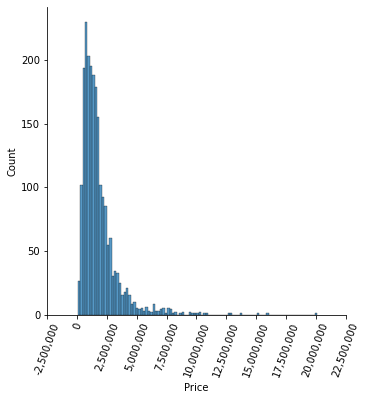

In [608]:
fig1 = sns.displot(data=data, x='Price')
ticks = fig1.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) for x in ticks]
fig1.set_xticklabels(xlabels, rotation=70)

[Text(0.5, 0, 'Mileage'), Text(0, 0.5, 'Price')]

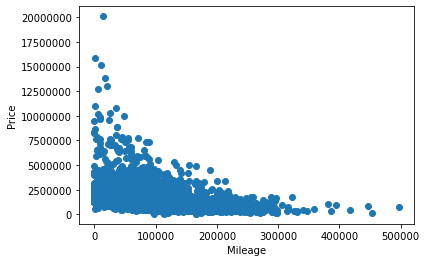

In [609]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots()
ax.scatter(data.auto_mileage, data.Price)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set(xlabel='Mileage', ylabel='Price')


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Price')]

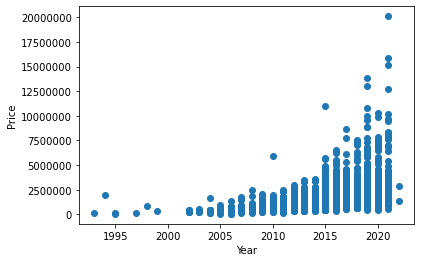

In [610]:
fig, ax = plt.subplots()
ax.scatter(data.auto_year, data.Price)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set(xlabel='Year', ylabel='Price')

It's clear that higher mileage leads to the lower price.

[Text(0.5, 0, 'Engine_displacement'), Text(0, 0.5, 'Price')]

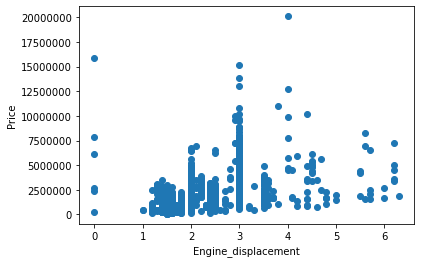

In [611]:
fig, ax = plt.subplots()
ax.scatter(data.Engine_displacement, data.Price)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set(xlabel='Engine_displacement', ylabel='Price')

[Text(0.5, 0, 'Capacity'), Text(0, 0.5, 'Price')]

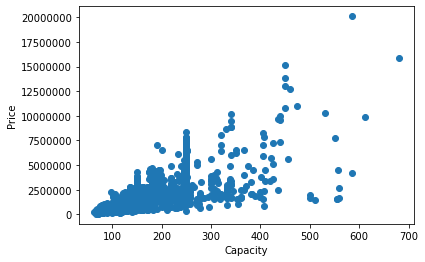

In [612]:
ыfig, ax = plt.subplots()
ax.scatter(data.Capacity, data.Price)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set(xlabel='Capacity', ylabel='Price')

In [613]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2157 entries, 0 to 2130
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 2157 non-null   object 
 1   auto_year            2157 non-null   int64  
 2   auto_mileage         2157 non-null   int64  
 3   auto_transmission    2157 non-null   object 
 4   auto_drive_unit      2157 non-null   object 
 5   auto_wheel           2157 non-null   object 
 6   auto_carcase         2157 non-null   object 
 7   auto_color           2157 non-null   object 
 8   link                 2157 non-null   object 
 9   guarantee            2157 non-null   int64  
 10  Engine_displacement  2157 non-null   float64
 11  Capacity             2157 non-null   int64  
 12  Fuel                 2157 non-null   object 
 13  Price                2157 non-null   int64  
 14  owners               2157 non-null   int64  
 15  brand                2157 non-null   o

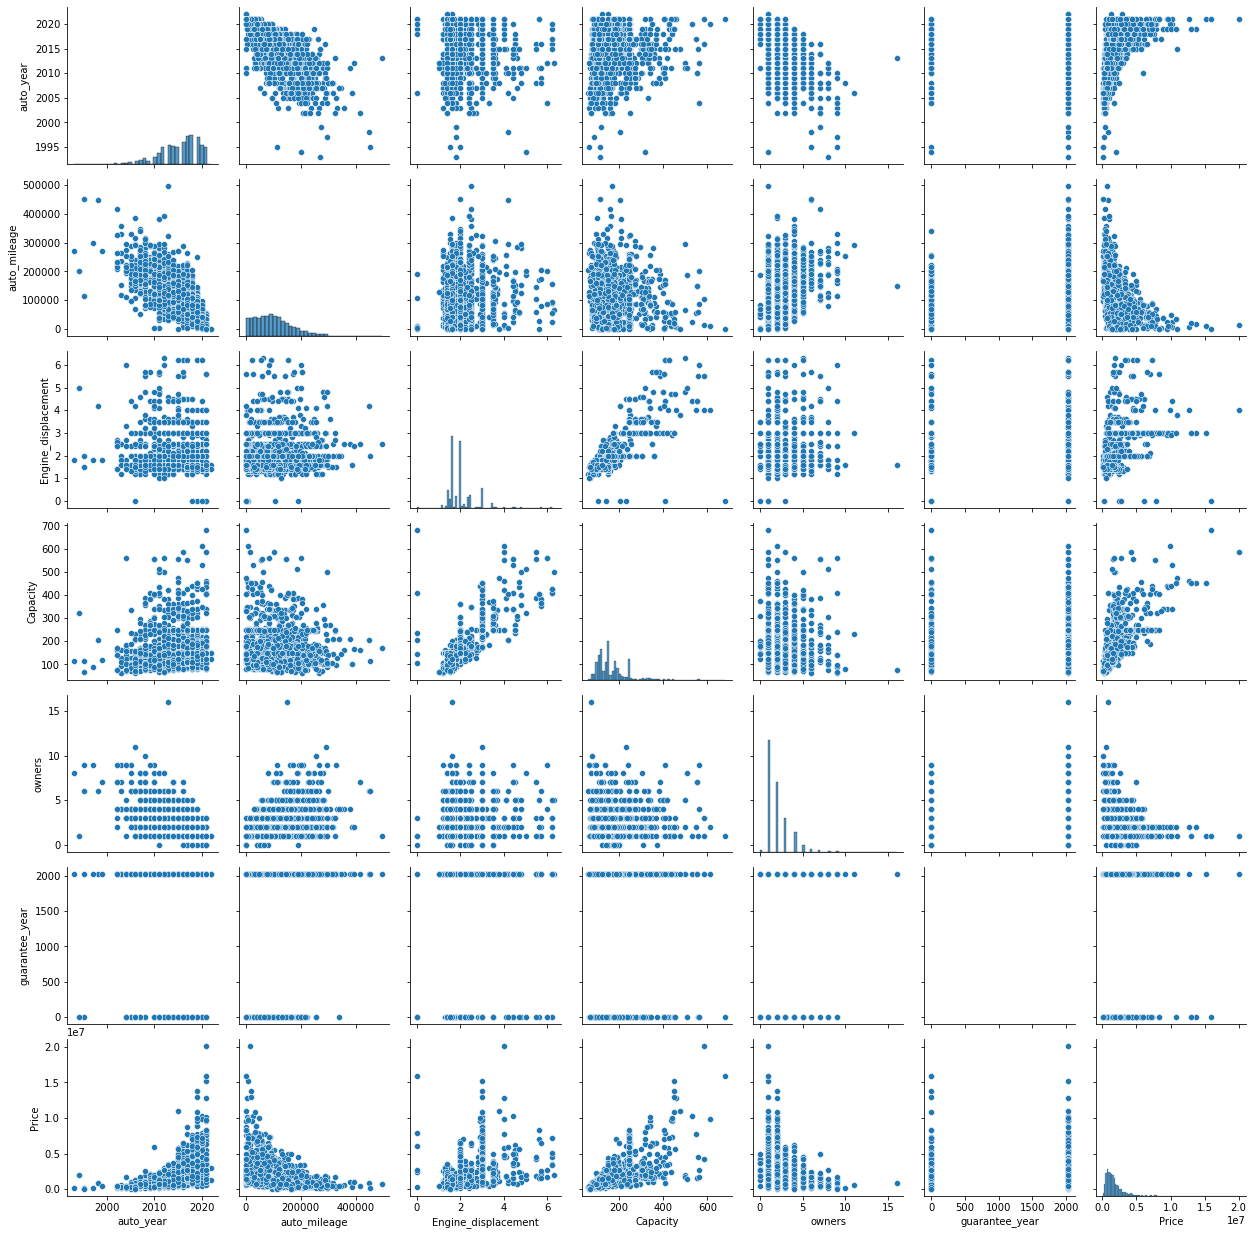

In [614]:
features = ['auto_year', 'auto_mileage', 'Engine_displacement', 'Capacity', 'owners', 'guarantee_year', 'Price']
g = sns.PairGrid(data[features])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

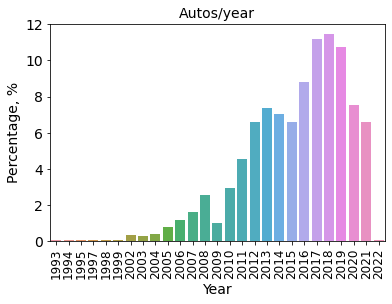

In [615]:
auto_year_val = (data['auto_year'].value_counts(normalize=True).mul(100).rename('Percent').reset_index())
sns.barplot(x='index', y='Percent', data=auto_year_val)
plt.title('Autos/year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage, %', fontsize=14)

plt.xticks(fontsize=12, rotation='vertical')
plt.yticks(fontsize=14)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

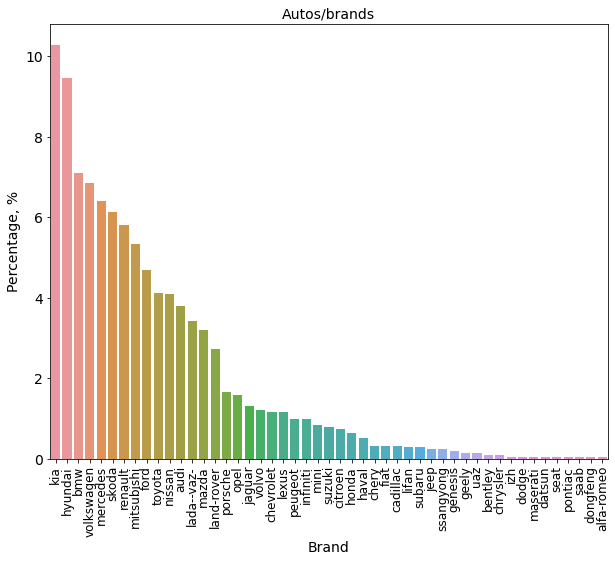

In [616]:
fig, ax = plt.subplots(figsize=(10, 8))
auto_brand = (data['brand'].value_counts(normalize=True).mul(100).rename('Percent').reset_index())
sns.barplot(ax=ax, x='index', y='Percent', data=auto_brand)
plt.title('Autos/brands', fontsize=14)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Percentage, %', fontsize=14)

plt.xticks(fontsize=12, rotation='vertical')
plt.yticks(fontsize=14)
#auto_brand.sort_values(by='Percent', ascending=False)

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

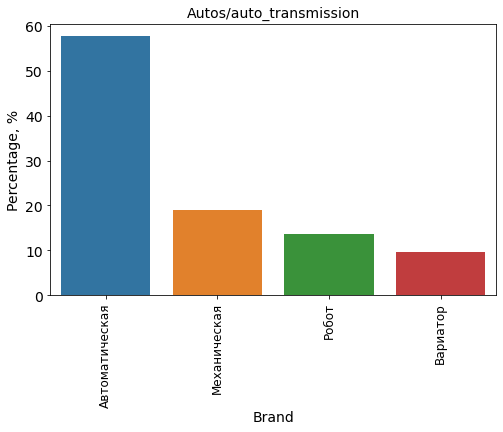

In [617]:
fig, ax = plt.subplots(figsize=(8, 5))
auto_brand = (data['auto_transmission'].value_counts(normalize=True).mul(100).rename('Percent').reset_index())
sns.barplot(ax=ax, x='index', y='Percent', data=auto_brand)
plt.title('Autos/auto_transmission', fontsize=14)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Percentage, %', fontsize=14)

plt.xticks(fontsize=12, rotation='vertical')
plt.yticks(fontsize=14)


(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

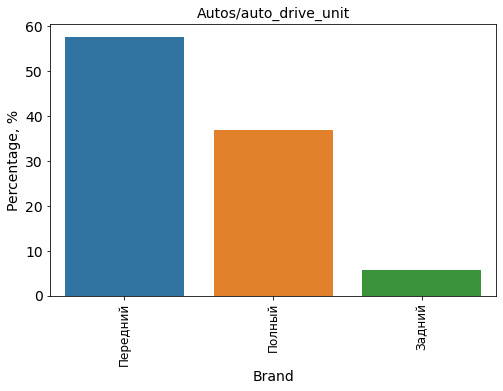

In [618]:
fig, ax = plt.subplots(figsize=(8, 5))
auto_brand = (data['auto_drive_unit'].value_counts(normalize=True).mul(100).rename('Percent').reset_index())
sns.barplot(ax=ax, x='index', y='Percent', data=auto_brand)
plt.title('Autos/auto_drive_unit', fontsize=14)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Percentage, %', fontsize=14)

plt.xticks(fontsize=12, rotation='vertical')
plt.yticks(fontsize=14)


In [619]:
data.head()

,Type,auto_year,auto_mileage,auto_transmission,auto_drive_unit,auto_wheel,auto_carcase,auto_color,link,guarantee,...,Fuel,Price,owners,brand,model,id,brand_model,guarantee_date,guarantee_month,guarantee_year
0,\r\n Mazda CX-5 АКПП 2015 с пробегом 13...,2015,133499,Автоматическая,Передний,Левый,Внедорожник 5 дв.,Красный,https://rolf-probeg.ru//spb/cars/mazda/cx-5/15...,1,...,Бензин,1499000,3,mazda,cx-5,15905191,mazda_cx-5,02.2024,2,2024
1,\r\n Lexus IS АКПП 2008 с пробегом 148 ...,2008,148558,Автоматическая,Задний,Левый,Седан,Светло-серо-голубой,https://rolf-probeg.ru//spb/cars/lexus/is/1608...,1,...,Бензин,1097000,4,lexus,is,16085241,lexus_is,01.2024,1,2024
2,\r\n Infiniti QX80 АКПП 2021 с пробегом...,2021,28022,Автоматическая,Полный,Левый,Внедорожник 5 дв.,Желтый,https://rolf-probeg.ru//spb/cars/infiniti/qx80...,1,...,Бензин,6995600,1,infiniti,qx80,16072132,infiniti_qx80,02.2024,2,2024
3,\r\n Nissan Qashqai CVT 2016 с пробегом...,2016,18517,Вариатор,Передний,Левый,Внедорожник 5 дв.,Белый,https://rolf-probeg.ru//spb/cars/nissan/qashqa...,1,...,Бензин,1568000,1,nissan,qashqai,14549428,nissan_qashqai,11.2023,11,2023
4,\r\n Hyundai i40 АКПП 2015 с пробегом 1...,2015,174494,Автоматическая,Передний,Левый,Седан,Коричневый,https://rolf-probeg.ru//spb/cars/hyundai/i40/1...,1,...,Бензин,983000,3,hyundai,i40,14817855,hyundai_i40,12.2023,12,2023


In [620]:
data['carcase'] = 0
SUV = ['Внедорожник 5 дв.', 'Внедорожник 3 дв.', 'Внедорожник 5 дв. Coupe', 'Внедорожник 5 дв. Grand',
       'Внедорожник 5 дв. Long', 'Внедорожник 5 дв. Allspace', 'Внедорожник 3 дв. Urban']

sedan = ['Седан', 'Седан Type-S', 'Седан Cross', 'Седан Long', 'Седан Stepway', 'Седан Gran Coupe', 'Седан LWB']

hatchback = ['Хэтчбек 5 дв.', 'Хэтчбек 5 дв. Stepway', 'Хэтчбек 5 дв. X', 'Хэтчбек 3 дв.', 'Хэтчбек 5 дв. Sport', 
             'Хэтчбек 3 дв. JCW', 'Хэтчбек 3 дв. GTC', 'Хэтчбек 3 дв. Cooper S', 'Хэтчбек 5 дв. Cross', 
             'Хэтчбек 5 дв. GT Line', 'Хэтчбек 5 дв. X-Line']

liftback = ['Лифтбек', 'Лифтбек Gran Coupe', 'Лифтбек Sportback', 'Лифтбек Gran Turismo']

station_wagon = ['Универсал 5 дв. SW', 'Универсал 5 дв. Scout', 'Универсал 5 дв. Alltrack', 
                 'Универсал 5 дв. SW Cross', 'Универсал 5 дв. Cross Turismo', 
                'Универсал 5 дв. Cooper S', 'Универсал 5 дв.']

minivan = ['Минивэн L', 'Минивэн', 'Минивэн SWB', 'Минивэн Grand', 'Минивэн XL']

In [621]:
def carcase_num(data):
    data['carcase'] = data.auto_carcase.apply(lambda x : 1 if x in SUV
                                              else 2 if x in sedan
                                              else 3 if x in hatchback
                                              else 4 if x in liftback
                                              else 5 if x in station_wagon
                                              else 6 if x in minivan
                                              else 0)

In [622]:
carcase_num(data)

In [623]:
data['drive_unit'] = 0

front = ['Передний']
back = ['Задний']

def auto_drive_unit_num(data):
    data['drive_unit'] = data.auto_drive_unit.apply(lambda x: 1 if x in front
                                                    else 2 if x in back
                                                    else 0)

In [624]:
auto_drive_unit_num(data)

In [625]:
data['transmission'] = 0

def auto_transmission_num(data):
    data['transmission'] = data.auto_transmission.apply(lambda x: 1 if x == 'Автоматическая' 
                                                        else 2 if x == 'Механическая'
                                                        else 3 if x == 'Робот'
                                                        else 4)

In [626]:
auto_transmission_num(data)

In [627]:
from sklearn.preprocessing import OrdinalEncoder

In [628]:
ord_enc = OrdinalEncoder()
data["auto_brand"] = ord_enc.fit_transform(data[["brand"]])
data["auto_model"] = ord_enc.fit_transform(data[["model"]])

In [629]:
data_country = pd.read_csv('brand_country.csv', sep=';')
data_country.head()

,brand,Country
0,mazda,Japan
1,lexus,Japan
2,infiniti,Japan
3,nissan,Japan
4,hyundai,South_Korea


In [630]:
data = data.join(data_country.set_index('brand'), on='brand')

In [631]:
data["auto_country"] = ord_enc.fit_transform(data[["Country"]])

In [632]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2157 entries, 0 to 2130
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 2157 non-null   object 
 1   auto_year            2157 non-null   int64  
 2   auto_mileage         2157 non-null   int64  
 3   auto_transmission    2157 non-null   object 
 4   auto_drive_unit      2157 non-null   object 
 5   auto_wheel           2157 non-null   object 
 6   auto_carcase         2157 non-null   object 
 7   auto_color           2157 non-null   object 
 8   link                 2157 non-null   object 
 9   guarantee            2157 non-null   int64  
 10  Engine_displacement  2157 non-null   float64
 11  Capacity             2157 non-null   int64  
 12  Fuel                 2157 non-null   object 
 13  Price                2157 non-null   int64  
 14  owners               2157 non-null   int64  
 15  brand                2157 non-null   o

In [633]:
features = ['Price', 'auto_year', 'auto_mileage', 'Engine_displacement', 
            'Capacity', 'owners', 'guarantee_year', 'carcase', 'drive_unit', 
            'transmission', 'auto_brand', 'auto_model', 'auto_country']

data_corr = data[features]
corr = data_corr.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Price,auto_year,auto_mileage,Engine_displacement,Capacity,owners,guarantee_year,carcase,drive_unit,transmission,auto_brand,auto_model,auto_country
Price,1.00,0.43,-0.38,0.46,0.69,-0.14,-0.14,-0.25,-0.38,-0.15,-0.07,0.01,-0.07
auto_year,0.43,1.00,-0.75,-0.06,0.06,-0.55,-0.02,-0.02,-0.08,-0.03,0.02,0.13,-0.08
auto_mileage,-0.38,-0.75,1.00,0.09,-0.05,0.45,0.06,0.02,0.01,0.04,0.01,-0.10,0.06
Engine_displacement,0.46,-0.06,0.09,1.00,0.80,0.19,-0.09,-0.31,-0.41,-0.21,-0.11,0.03,0.09
Capacity,0.69,0.06,-0.05,0.80,1.00,0.15,-0.14,-0.30,-0.42,-0.19,-0.17,-0.02,-0.01
owners,-0.14,-0.55,0.45,0.19,0.15,1.00,-0.01,-0.01,0.04,-0.09,-0.06,-0.14,0.02
guarantee_year,-0.14,-0.02,0.06,-0.09,-0.14,-0.01,1.00,-0.04,0.02,0.03,-0.01,0.05,0.01
carcase,-0.25,-0.02,0.02,-0.31,-0.30,-0.01,-0.04,1.00,0.41,-0.02,0.04,-0.07,-0.06
drive_unit,-0.38,-0.08,0.01,-0.41,-0.42,0.04,0.02,0.41,1.00,-0.03,0.02,-0.18,-0.05
transmission,-0.15,-0.03,0.04,-0.21,-0.19,-0.09,0.03,-0.02,-0.03,1.00,0.20,0.05,-0.20


High correlation b/t features: <br/>
    1) auto_year, auto_mileage, auto_mileage, owners. Corr b/w auto_year&Price is the higest <br/>
    2) Capacity, Engine_displacement. Corr b/w Capacity&Price is higher	<br/>

In [634]:
data_corr = data_corr.drop(columns=['auto_mileage', 'owners', 'Engine_displacement', 'auto_model', 'auto_country'])

In [635]:
corr = data_corr.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Price,auto_year,Capacity,guarantee_year,carcase,drive_unit,transmission,auto_brand
Price,1.00,0.43,0.69,-0.14,-0.25,-0.38,-0.15,-0.07
auto_year,0.43,1.00,0.06,-0.02,-0.02,-0.08,-0.03,0.02
Capacity,0.69,0.06,1.00,-0.14,-0.30,-0.42,-0.19,-0.17
guarantee_year,-0.14,-0.02,-0.14,1.00,-0.04,0.02,0.03,-0.01
carcase,-0.25,-0.02,-0.30,-0.04,1.00,0.41,-0.02,0.04
drive_unit,-0.38,-0.08,-0.42,0.02,0.41,1.00,-0.03,0.02
transmission,-0.15,-0.03,-0.19,0.03,-0.02,-0.03,1.00,0.20
auto_brand,-0.07,0.02,-0.17,-0.01,0.04,0.02,0.20,1.00


In [636]:
y = data_corr['Price']
X = data_corr.drop(columns=['Price'])

In [637]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [638]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(n_jobs=-1).fit(X_train, y_train)
prediction = reg.predict(X_test).astype('int64')

In [639]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, prediction)

1056542166690.9213

In [640]:
print('linear model coeff (w): {}'
     .format(reg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(reg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(reg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(reg.score(X_test, y_test)))

linear model coeff (w): [ 1.46697699e+05  1.43633843e+04 -7.22715984e+01 -5.00192097e+04
 -1.65632923e+05 -2.95504717e+04  4.77431821e+03]
linear model intercept (b): -295995342.623
R-squared score (training): 0.644
R-squared score (test): 0.549


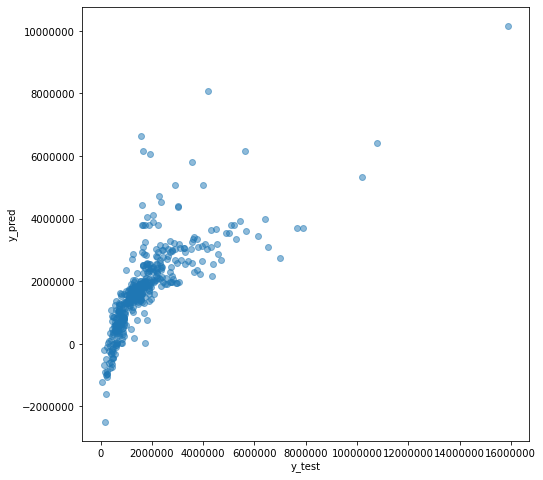

In [645]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.ticklabel_format(style='plain')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [646]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
# Random search of parameters, using 5 fold cross validation, search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5, 
                               verbose=1, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [647]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [648]:
prediction = rf_random.predict(X_test)

In [651]:
print('r2 score: ', metrics.r2_score(y_test, prediction))

r2 score:  0.8583663283825418


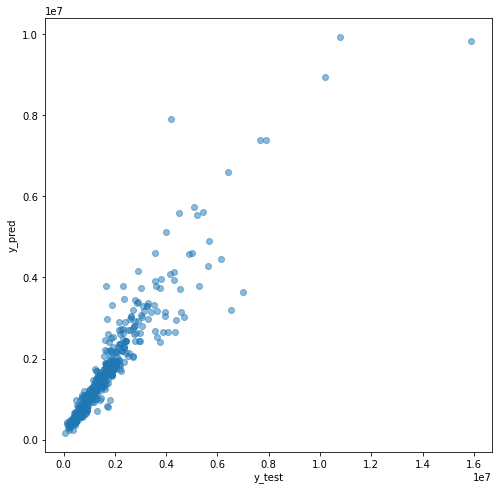

In [652]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [659]:
data.auto_transmission.unique()

array(['Автоматическая', 'Вариатор', 'Робот', 'Механическая'],
      dtype=object)